# Newtons method

Youtube: https://www.youtube.com/watch?v=LTZkxhZUG80&list=PL6BsET-8jgYVjYcbAWtliLo897OLb48Ot

Quickly finds accurate approximations to zereos of differentiable functions.

Here, we have plotted $f(x) = x^2 - 2$
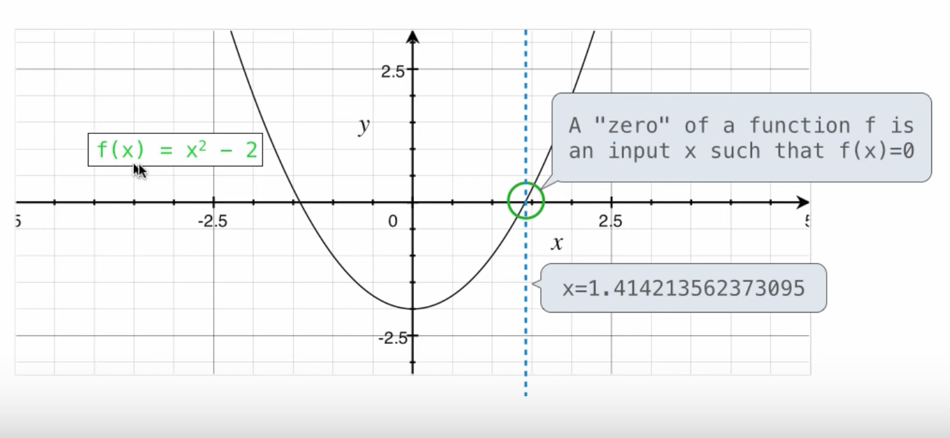

Application:

A method for computig square roots, rube roots, etc.

The positive zero of $f(x) = x^2 - a$ is ${\sqrt{a}}$ 

## Method:

1. Given a function f and initial guess x,

    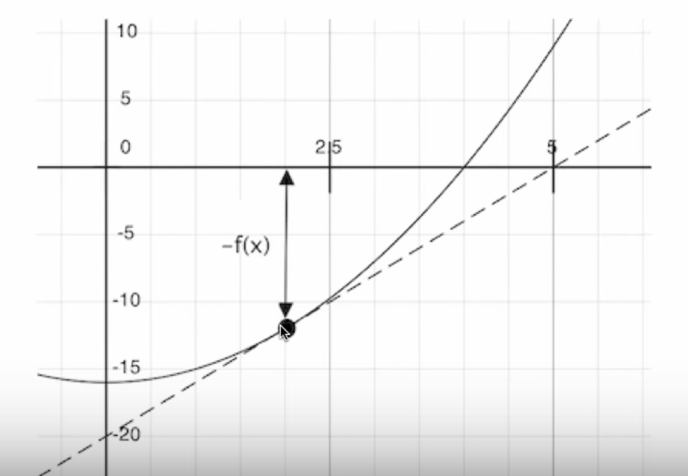

    Here, we've made an initial guess of 2, and clearly y isn't at 0.

2. Repeatedly improve x:

    Computer the vaue of f at the guess $f(x)$

    Calculate the derivative of $f$ at the guess: $f'(x)$

    Update guess x to be:

    $x - \frac{f(x)}{f'(x)}$
3. Finish when $f(x) = 0$ (or close enough)

## How to find the square root of 2?

```python
f = lambda x: x*x - 2
df = lambda x: 2 * x
find_zero(f, df)
```
## How to find the cube root of 729
```python
g - lambda x: x*x*x - 729
dg = lambda x: 3*x*x
find_zero(g, dg)
```

## Special case: Square Roots

How to computer square_root(a)

Idea: Iteratively refine a guess x about the square root of a

Update: 

$x = \frac{x + \frac{a}{x}}{2}$

Babylonian method

In [46]:
def square_root(a):
    x = 1
    while x * x != a:
        print(x)
        x = square_root_update(x, a)
    return x

def square_root_update(x, a):
    return (x + a / x) / 2

square_root(9)
    

1
5.0
3.4
3.023529411764706
3.00009155413138
3.000000001396984


3.0

What happens if I try `square_root(2)`? The function runs forever. Whoops

## Special Case: Cube Roots

How to compute cube_root(a)

Idea: Iteratively refine a guess x about the cube root of a

Update:

$$x = \frac{2 * x + \frac{a}{x^2}}{3}$$

In [47]:
def cube_root(a):
    x = 1
    while x * x * x != a:
        print(x)
        x = cube_root_update(x, a)
    return x

def cube_root_update(x, a):
    return (2 * x + a / (x * x)) / 3

cube_root(27)

1
9.666666666666666
6.540758356453956
4.570876778578707
3.4780192333867963
3.0626891086275365
3.001274406506175
3.0000005410641766
3.0000000000000977


3.0

In [48]:
def improve(update, close, guess = 1):
    while not close(guess):
        guess = update(guess)
        
    return guess

def approx_eq(x, y, tolerance=1e-15):
    return abs(x-y) < tolerance

print(approx_eq(2, 2.0000000000000000001))
print(approx_eq(2, 2.00000000001))

True
False


In [49]:
def square_root(a):
    def update(x):
        return square_root_update(x, a)
    def close(x):
        return approx_eq(x * x, a)
    return improve(update, close)

In [50]:
square_root(2)

1.414213562373095

In [51]:
def cube_root(a):
    return improve(lambda x: cube_root_update(x, a),
                   lambda x: approx_eq(x * x * x, a))

cube_root(4)

1.5874010519681994

Now, improve still doesn't return when $a = 10$. We could either relax our tolerance for `approx_eq`, or we can limit how many iterations improve executes before returning:

In [52]:
def improve(update, close, guess = 1, max_update = 100):
    k = 0
    while not close(guess) and k < max_update:
        guess = update(guess)
        k = k +1
        
    return guess


cube_root(10)

2.154434690031884

## Implementing newtons methods 

In [53]:
def find_zero(f, df):
    def near_zero(x):
        return approx_eq(f(x), 0)
    return improve(newton_update(f, df), near_zero)

def newton_update(f, df):
    def update(x):
        return x - f(x) / df(x)
    return update

def square_root(a):
    def f(x):
        return x*x - a
    def df(x):
        return 2*x 
    return find_zero(f, df)

def cube_root(a):
    return find_zero(lambda x: x*x*x - a,
              lambda x: 3*x*x)

def power(x , n):
    product, k = 1, 0
    while k < n:
        product, k = product * x, k + 1
    return product

def root(n, a):
    def f(x):
        return power(x, n) - a
    def df(x):
        return n * power(x, n - 1)
    return find_zero(f, df)

root(6, 729)

3.0

## Approximate Differentiation

Link: https://www.youtube.com/watch?v=vMeg1OAN6c0&list=PL6BsET-8jgYVjYcbAWtliLo897OLb48Ot&index=4
        
Differentiation can be performed symbolically, or numerically, which is what we were doing previously.

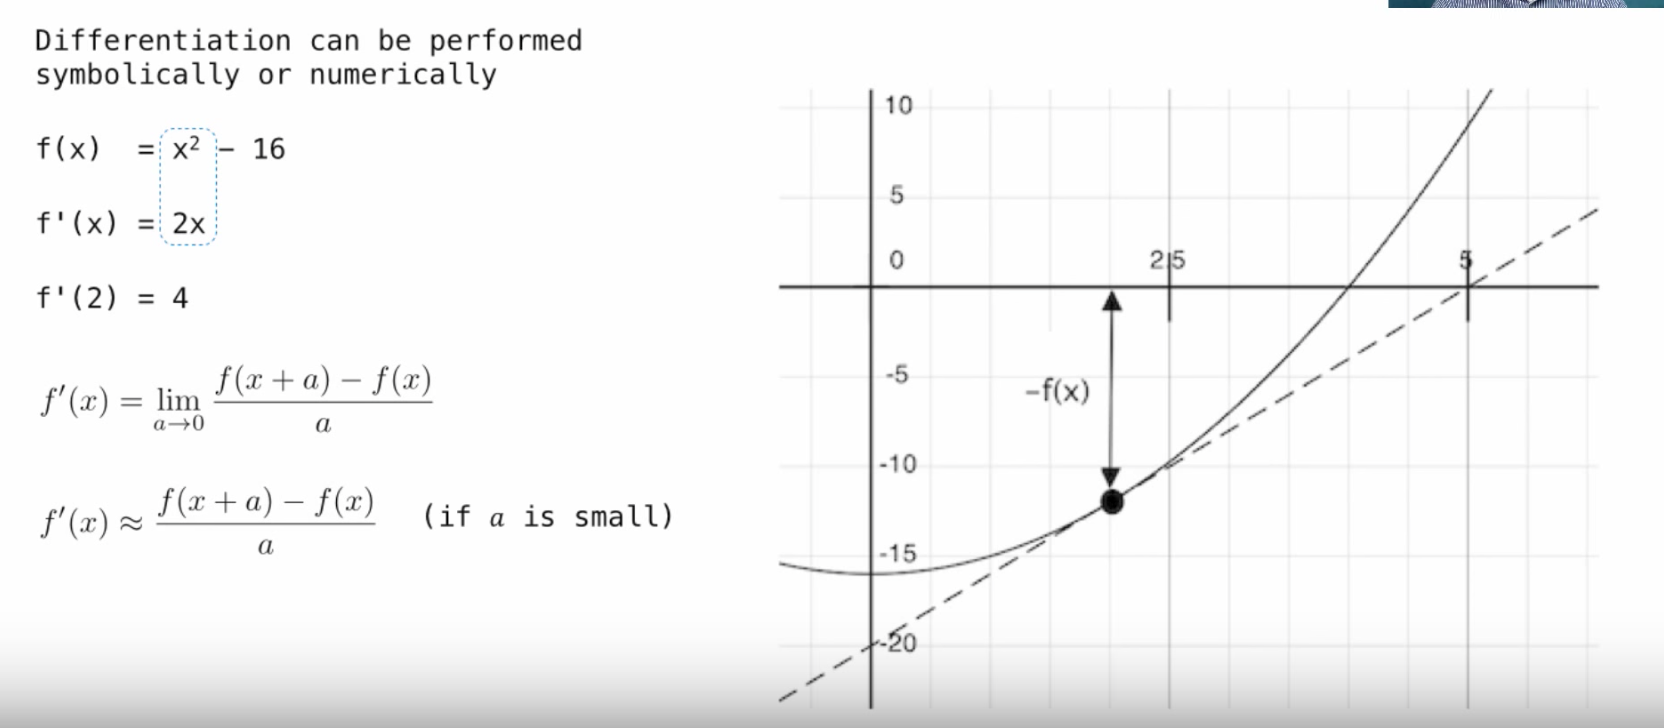

In [54]:
def  root(n, a):
    def f(x): 
        return pow(x, n) - a
    def df(x):
        return n * pow(z, n-1)
    return approx_zero(f)

def slope(f, x, a = 1e-5):
    return (f(x + a) - f(x)) / a

def derive(f):
    return lambda x: slope(f, x)

def approx_zero(f):
    return find_zero(f, derive(f))

root(2, 16)

4.0

## Critical Points and inverses


Maximx, Minima, inflection points of a differentiable function occur when the derivative is 0

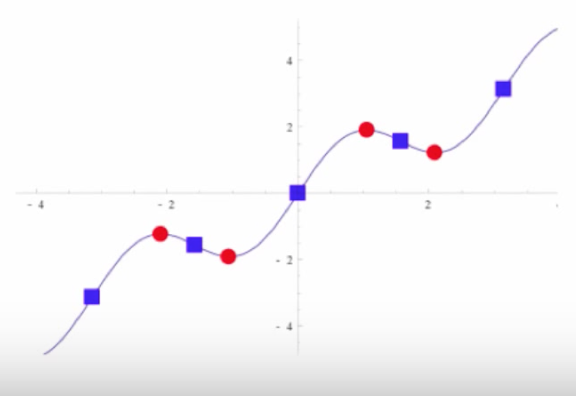

In [55]:
# We need to pass a down

def slope(f, x, a = 1e-5):
    return (f(x + a) - f(x)) / a

def derive(f, a = 1e-5):
    return lambda x: slope(f, x, a)

def approx_zero(f):
    return find_zero(f, derive(f, 1e-10))

def critical(f):
    return f(approx_zero(derive(f)))

f = lambda x: x * x + 4 * x + 1
f(5)


46

In [56]:
critical(f)

-2.9999999999750004

## Inverse of a function

The inverse $f^-1(y)$ of a differentiable, one-to-one function computes the value $x$ such that $f(x) = y$

In [57]:
def inverse(f):
    return lambda y: approx_zero(lambda x: f(x) - y)

In [58]:
square_root = inverse(lambda x: x*x)
square_root(4)

2.0

Perhaps that's simplest definition of square root, using functions composed of functions around this core idea of Newton's method